In [166]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv('Data/CarPrice_processed.csv')
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,cylindernumber_mapped,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,4,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,6,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,4,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,5,0,0,0,0,1,0,0


In [31]:
# Generating the base estimator
lin_reg = LinearRegression(n_jobs=-1)
n_features = 1
# Instantiating the RFE component
rfe = RFE(estimator=lin_reg, n_features_to_select=n_features)

In [32]:
rfe.fit(data.drop(columns = ['price']), data[['price']])

RFE(estimator=LinearRegression(n_jobs=-1), n_features_to_select=1)

In [33]:
rfe.ranking_

array([26, 32, 34,  7, 20, 36, 24,  9, 16, 13, 33, 37, 35, 29, 30, 18, 12,
       22, 25, 14,  8,  3,  1, 10,  6, 31, 15,  2, 21, 28, 27,  5, 11, 23,
       17, 19,  4])

In [34]:
rfe.n_features_

1

In [35]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [36]:
data.columns.difference(['price'])[rfe.support_]

Index(['enginetype_rotor'], dtype='object')

In [37]:
rank_data = pd.DataFrame({'ColumnName':data.columns.difference(['price']), 'Rank':rfe.ranking_})
rank_data = rank_data.sort_values('Rank').reset_index(drop=True)
rank_data

,ColumnName,Rank
0,enginetype_rotor,1
1,fuelsystem_mpfi,2
2,enginetype_ohcv,3
3,wheelbase,4
4,highwaympg,5
5,fuelsystem_4bbl,6
6,boreratio,7
7,enginetype_ohcf,8
8,carwidth,9
9,fuelsystem_2bbl,10


## Find the best features {Excluding the one hot encoded vars}

In [47]:
# Splitting the data
train_data, test_data = train_test_split(data, test_size=.25, random_state=9)

train_data.shape, test_data.shape

((153, 38), (52, 38))

In [39]:
ohe_vars = []
for col in data.columns:
    if sorted(data[col].unique()) == [0,1]:
        ohe_vars.append(col)

In [41]:
sorted(ohe_vars)

['aspiration_turbo',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'fueltype_gas']

In [42]:
indicators = ['aspiration_turbo', 'enginelocation_rear', 'fueltype_gas']

In [45]:
ohe_vars = [col for col in ohe_vars if not col in indicators]

In [49]:
features = data.columns.difference(ohe_vars+['price'])
features

Index(['CarCompanyName_le', 'CarName_Encoded', 'aspiration_turbo', 'boreratio',
       'carbody_ord_enc', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'cylindernumber_mapped',
       'doornumber_num', 'enginelocation_rear', 'enginesize', 'fueltype_gas',
       'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'symboling',
       'wheelbase'],
      dtype='object')

In [50]:
req_train_x = train_data[features]
req_test_x = test_data[features]

train_y = train_data['price']
test_y = test_data['price']

In [80]:
final_metadata = {'support':[], 'ranking' : [], 'n_features':[], 'train_loss':[], 'test_loss':[], 'score':[]}

print(f'{"number of features":20} {"train loss":20} {"test loss":20} {"score":20}')
print()
for n_features in range(1, len(req_train_x.columns)+1):
    lin_reg = LinearRegression(n_jobs=-1)
    rfe_1 = RFE(estimator=lin_reg, n_features_to_select=n_features)
    rfe_1.fit(req_train_x, train_y)
    score = round(rfe_1.score(req_test_x, test_y),4)

    predicted_y_tr = rfe_1.predict(req_train_x)
    train_loss = round(mean_absolute_error(train_y, predicted_y_tr), 4)
    
    predicted_y_ts = rfe_1.predict(req_test_x)
    test_loss = round(mean_absolute_error(test_y, predicted_y_ts), 4)
    
    final_metadata['support'].append(rfe_1.support_)
    final_metadata['ranking'].append(rfe_1.ranking_)
    final_metadata['n_features'].append(n_features)
    final_metadata['train_loss'].append(train_loss)
    final_metadata['test_loss'].append(test_loss)
    final_metadata['score'].append(score)
    
    
    print(f'{n_features:<20} {train_loss:<20} {test_loss:<20} {score:<20}')

number of features   train loss           test loss            score               

1                    5475.7153            5796.4113            -0.0029             
2                    4420.0315            4359.6726            0.3153              
3                    3303.3988            2907.3321            0.7415              
4                    2687.2955            2376.8427            0.8372              
5                    2575.059             2386.948             0.8445              
6                    2577.115             2382.6747            0.8446              
7                    2285.0373            2430.8355            0.8309              
8                    2271.9537            2435.063             0.8281              
9                    2277.0442            2408.8725            0.8299              
10                   2281.023             2346.4942            0.8456              
11                   2285.9498            2342.7048            0.8463      

In [85]:
performance_data = pd.DataFrame(final_metadata)
performance_data = performance_data.sort_values(['score'], ascending=False).reset_index(drop=True)
performance_data

,support,ranking,n_features,train_loss,test_loss,score
0,"[True, True, True, True, True, True, True, Tru...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",21,1763.9325,1780.2312,0.9041
1,"[True, True, True, True, True, True, True, Tru...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",22,1777.8887,1833.9085,0.9018
2,"[True, True, True, True, True, True, True, Tru...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",20,1786.5631,1852.1788,0.9015
3,"[True, True, False, True, True, True, True, Tr...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, ...",19,1786.6677,1851.6918,0.9015
4,"[True, True, False, True, True, True, False, T...","[1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, ...",18,1793.5047,1841.8894,0.9014
5,"[True, True, False, True, True, True, False, T...","[1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, ...",17,1932.8537,2034.9229,0.8802
6,"[True, False, False, True, True, False, False,...","[1, 3, 9, 1, 1, 4, 8, 1, 1, 1, 10, 1, 1, 1, 6,...",12,2146.2818,2161.0616,0.8731
7,"[True, False, False, True, True, False, False,...","[1, 2, 8, 1, 1, 3, 7, 1, 1, 1, 9, 1, 1, 1, 5, ...",13,2151.3707,2186.0451,0.8693
8,"[True, True, False, True, True, False, False, ...","[1, 1, 7, 1, 1, 2, 6, 1, 1, 1, 8, 1, 1, 1, 4, ...",14,1963.8302,2258.1637,0.8531
9,"[True, True, False, True, True, True, False, T...","[1, 1, 6, 1, 1, 1, 5, 1, 1, 1, 7, 1, 1, 1, 3, ...",15,1962.4443,2282.5025,0.8513


In [86]:
import seaborn as sns

<AxesSubplot: xlabel='n_features', ylabel='score'>

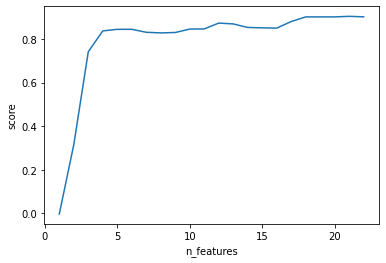

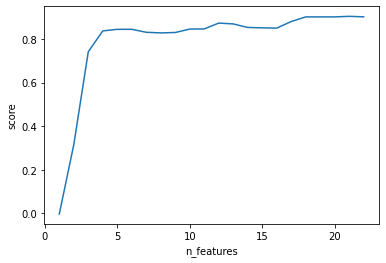

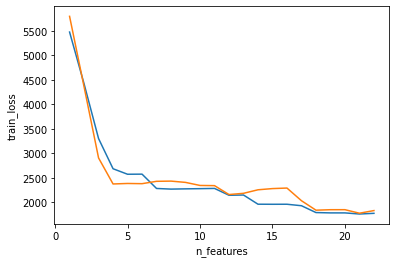

In [97]:
sns.lineplot(performance_data, x = 'n_features', y='score')
plt.show()
sns.lineplot(performance_data, x = 'n_features', y = 'train_loss')
sns.lineplot(performance_data, x = 'n_features', y = 'test_loss')
plt.show()

### Working on n_features = 21

In [102]:
slice_ = performance_data[performance_data['n_features']==21]
slice_

,support,ranking,n_features,train_loss,test_loss,score
0,"[True, True, True, True, True, True, True, Tru...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",21,1763.9325,1780.2312,0.9041


In [123]:
support = list(map(bool, slice_.support.to_list()[0]))
feat_cols = req_train_x.columns[support]
feat_cols

Index(['CarCompanyName_le', 'CarName_Encoded', 'aspiration_turbo', 'boreratio',
       'carbody_ord_enc', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'cylindernumber_mapped',
       'doornumber_num', 'enginelocation_rear', 'enginesize', 'fueltype_gas',
       'highwaympg', 'horsepower', 'stroke', 'symboling', 'wheelbase'],
      dtype='object')

In [124]:
ohe_vars_set = [['drivewheel_fwd','drivewheel_rwd'],
                ['enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','enginetype_rotor'],
                ['fuelsystem_2bbl','fuelsystem_4bbl','fuelsystem_idi','fuelsystem_mfi','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi']]

In [134]:
sorted(data.columns)

['CarCompanyName_le',
 'CarName_Encoded',
 'aspiration_turbo',
 'boreratio',
 'carbody_ord_enc',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber_mapped',
 'doornumber_num',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginesize',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'fueltype_gas',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'price',
 'stroke',
 'symboling',
 'wheelbase']

In [156]:
print(f'{"tr_loss":<10}{"tr_score":<20}{"ts_loss":<10}{"ts_score":<20}')
current_performance = .9041
target = ['price']
for ohe_set_ in ohe_vars_set:
    new_cols = list(feat_cols).__add__(ohe_set_)
    data_ = data[new_cols.__add__(target)]
    
    x,y = data_.drop(columns=target), data_[target]
    tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=.25, random_state=9)
    
    lin_reg = LinearRegression(n_jobs=-1)
    lin_reg.fit(tr_x, tr_y)
    
#     for training performance
    pred_tr_y = lin_reg.predict(tr_x)
    tr_loss = mean_absolute_error(tr_y, pred_tr_y)
    
#     for testing performance
    pred_ts_y = lin_reg.predict(ts_x)
    ts_loss = mean_absolute_error(ts_y, pred_ts_y)

    tr_score = lin_reg.score(tr_x, tr_y)
    ts_score = lin_reg.score(ts_x, ts_y)

    print(f'{tr_loss:<10,.04f}{tr_score:<20,.04f}{ts_loss:<10,.04f}{ts_score:<20,.04f}')

tr_loss   tr_score            ts_loss   ts_score            
1,747.88340.9075              1,809.14020.9073              
1,559.77220.9258              1,474.93770.9391              
1,686.18090.9096              1,768.41480.9076              


In [137]:
feat_cols

Index(['CarCompanyName_le', 'CarName_Encoded', 'aspiration_turbo', 'boreratio',
       'carbody_ord_enc', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'cylindernumber_mapped',
       'doornumber_num', 'enginelocation_rear', 'enginesize', 'fueltype_gas',
       'highwaympg', 'horsepower', 'stroke', 'symboling', 'wheelbase'],
      dtype='object')

In [138]:
new_features_set = list(feat_cols).__add__(ohe_vars_set[1])
new_features_set

['CarCompanyName_le',
 'CarName_Encoded',
 'aspiration_turbo',
 'boreratio',
 'carbody_ord_enc',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber_mapped',
 'doornumber_num',
 'enginelocation_rear',
 'enginesize',
 'fueltype_gas',
 'highwaympg',
 'horsepower',
 'stroke',
 'symboling',
 'wheelbase',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor']

In [145]:
ohe_vars_set_2 = [['drivewheel_fwd', 'drivewheel_rwd'],
                 ['fuelsystem_2bbl',
                  'fuelsystem_4bbl',
                  'fuelsystem_idi',
                  'fuelsystem_mfi',
                  'fuelsystem_mpfi',
                  'fuelsystem_spdi',
                  'fuelsystem_spfi']]

In [152]:
print(f'{"tr_loss":<10}{"tr_score":<15}{"ts_loss":<10}{"ts_score":<15}')
current_performance = .9041
target = ['price']
for ohe_set_ in ohe_vars_set_2:
    new_cols = list(new_features_set).__add__(ohe_set_)
    data_ = data[new_cols.__add__(target)]
    
    x,y = data_.drop(columns=target), data_[target]
    tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=.25, random_state=9)
    
    lin_reg = LinearRegression(n_jobs=-1)
    lin_reg.fit(tr_x, tr_y)
    
#     for training performance
    pred_tr_y = lin_reg.predict(tr_x)
    tr_loss = mean_absolute_error(tr_y, pred_tr_y)
    
#     for testing performance
    pred_ts_y = lin_reg.predict(ts_x)
    ts_loss = mean_absolute_error(ts_y, pred_ts_y)

    tr_score = lin_reg.score(tr_x, tr_y)
    ts_score = lin_reg.score(ts_x, ts_y)

    print(f'{tr_loss:<10,.04f}{tr_score:<15,.04f}{ts_loss:<10,.04f}{ts_score:<15,.04f}')

tr_loss   tr_score       ts_loss   ts_score       
1,544.07920.9265         1,470.06690.9407         
1,496.31230.9289         1,560.84340.9361         


In [147]:
new_features_set_2 = list(new_features_set).__add__(ohe_vars_set_2[0])
new_features_set_2

['CarCompanyName_le',
 'CarName_Encoded',
 'aspiration_turbo',
 'boreratio',
 'carbody_ord_enc',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber_mapped',
 'doornumber_num',
 'enginelocation_rear',
 'enginesize',
 'fueltype_gas',
 'highwaympg',
 'horsepower',
 'stroke',
 'symboling',
 'wheelbase',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'drivewheel_fwd',
 'drivewheel_rwd']

In [149]:
print(f'{"tr_loss":<10}{"tr_score":<10}{"ts_loss":<10}{"ts_score":<10}')
current_performance = .9041
target = ['price']
for ohe_set_ in [ohe_vars_set_2[-1]]:
    new_cols = list(new_features_set_2).__add__(ohe_set_)
    data_ = data[new_cols.__add__(target)]
    
    x,y = data_.drop(columns=target), data_[target]
    tr_x, ts_x, tr_y, ts_y = train_test_split(x,y, test_size=.25, random_state=9)
    
    lin_reg = LinearRegression(n_jobs=-1)
    lin_reg.fit(tr_x, tr_y)
    
#     for training performance
    pred_tr_y = lin_reg.predict(tr_x)
    tr_loss = mean_absolute_error(tr_y, pred_tr_y)
    
#     for testing performance
    pred_ts_y = lin_reg.predict(ts_x)
    ts_loss = mean_absolute_error(ts_y, pred_ts_y)

    tr_score = lin_reg.score(tr_x, tr_y)
    ts_score = lin_reg.score(ts_x, ts_y)

    print(f'{tr_loss:<10,.02f}{tr_score:<10,.02f}{ts_loss:<10,.02f}{ts_score:<10,.02f}')

tr_loss   tr_score  ts_loss   ts_score  
1,489.91  0.93      1,556.74  0.94      


## Mathematical transformations

In [161]:
df1 = data[new_features_set_2.__add__(['price'])].reset_index(drop = True)
df1.head()

,CarCompanyName_le,CarName_Encoded,aspiration_turbo,boreratio,carbody_ord_enc,carheight,carlength,carwidth,citympg,compressionratio,...,wheelbase,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,price
0,0,0,0,3.47,4,48.8,168.8,64.1,21,9.0,...,88.6,0,0,0,0,0,0,0,1,13495.0
1,0,1,0,3.47,4,48.8,168.8,64.1,21,9.0,...,88.6,0,0,0,0,0,0,0,1,16500.0
2,0,2,0,2.68,1,52.4,171.2,65.5,19,9.0,...,94.5,0,0,0,0,1,0,0,1,16500.0
3,1,3,0,3.19,2,54.3,176.6,66.2,24,10.0,...,99.8,0,0,1,0,0,0,1,0,13950.0
4,1,4,0,3.19,2,54.3,176.6,66.4,18,8.0,...,99.4,0,0,1,0,0,0,0,0,17450.0


In [164]:
df1.wheelbase.min(), df1.wheelbase.max(), df1.wheelbase.mean(), df1.wheelbase.median()

(86.6, 120.9, 98.75658536585367, 97.0)

<AxesSubplot: ylabel='Density'>

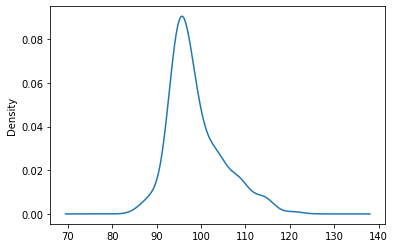

In [165]:
df1.wheelbase.plot(kind = 'kde')

### Standardization

<AxesSubplot: ylabel='Density'>

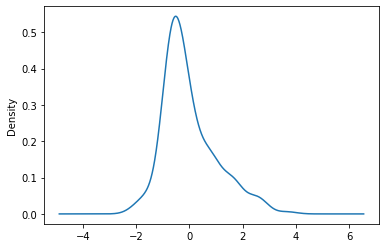

In [173]:
ss = StandardScaler()
standard_scaled_wheelbase = ss.fit_transform(df1[['wheelbase']]).flatten()
pd.Series(standard_scaled_wheelbase).plot(kind = 'kde')

### Min-Max Scaled Data

<AxesSubplot: ylabel='Density'>

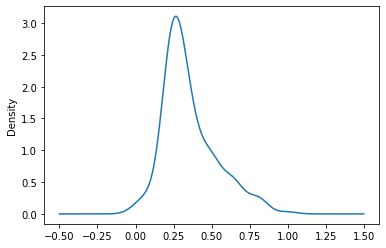

In [179]:
mm = MinMaxScaler()
minmax_scaled_wheelbase = mm.fit_transform(df1[['wheelbase']]).flatten()
pd.Series(minmax_scaled_wheelbase).plot(kind = 'kde')

### Log Transformed data

<AxesSubplot: ylabel='Density'>

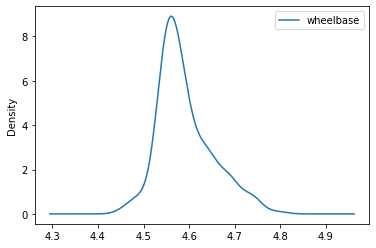

In [187]:
log_transformed = np.log(df1[['wheelbase']])
log_transformed.plot(kind = 'kde')

### Square-root transformed data

<AxesSubplot: ylabel='Density'>

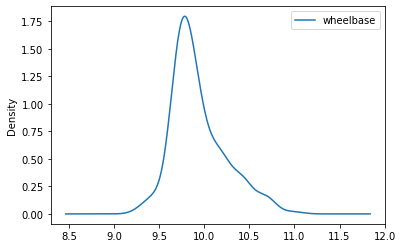

In [189]:
sqrt_transformed = np.sqrt(df1[['wheelbase']])
sqrt_transformed.plot(kind = 'kde')

In [243]:
wheelbase_df = pd.DataFrame({'Original':df1.wheelbase, 
              'StandardScaled':standard_scaled_wheelbase, 
              'MinMaxScaled':minmax_scaled_wheelbase, 
              'LogTransformed':log_transformed.values.flatten(), 
              'SqrtTransformed':sqrt_transformed.values.flatten()})

In [244]:
wheelbase_df

,Original,StandardScaled,MinMaxScaled,LogTransformed,SqrtTransformed
0,88.6,-1.690772,0.058309,4.484132,9.412757
1,88.6,-1.690772,0.058309,4.484132,9.412757
2,94.5,-0.708596,0.230321,4.548600,9.721111
3,99.8,0.173698,0.384840,4.603168,9.989995
4,99.4,0.107110,0.373178,4.599152,9.969955
...,...,...,...,...,...
200,109.1,1.721873,0.655977,4.692265,10.445095
201,109.1,1.721873,0.655977,4.692265,10.445095
202,109.1,1.721873,0.655977,4.692265,10.445095
203,109.1,1.721873,0.655977,4.692265,10.445095


In [245]:
wheelbase_df.mean()

Original           9.875659e+01
StandardScaled    -1.291108e-15
MinMaxScaled       3.544194e-01
LogTransformed     4.590874e+00
SqrtTransformed    9.933165e+00
dtype: float64

###### Note :
- DO NOT USE VARIABLES WITH VERY HIGH CARDINALITY. SUCH VARIABLES CAN REDUCE THE PERFORMANCE OF THE MODEL SIGNIFICANTLY.
- CarName_Encoded should not be used in the modelling as it has a very high cardinality of 147

### Improvising the model

In [204]:
new_features_set_2

['CarCompanyName_le',
 'CarName_Encoded',
 'aspiration_turbo',
 'boreratio',
 'carbody_ord_enc',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber_mapped',
 'doornumber_num',
 'enginelocation_rear',
 'enginesize',
 'fueltype_gas',
 'highwaympg',
 'horsepower',
 'stroke',
 'symboling',
 'wheelbase',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'drivewheel_fwd',
 'drivewheel_rwd']

In [207]:
df_new = data[new_features_set_2.__add__(['price'])]
df_new.head(3)

,CarCompanyName_le,CarName_Encoded,aspiration_turbo,boreratio,carbody_ord_enc,carheight,carlength,carwidth,citympg,compressionratio,...,wheelbase,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,price
0,0,0,0,3.47,4,48.8,168.8,64.1,21,9.0,...,88.6,0,0,0,0,0,0,0,1,13495.0
1,0,1,0,3.47,4,48.8,168.8,64.1,21,9.0,...,88.6,0,0,0,0,0,0,0,1,16500.0
2,0,2,0,2.68,1,52.4,171.2,65.5,19,9.0,...,94.5,0,0,0,0,1,0,0,1,16500.0


In [198]:
new_features_set_2

['CarCompanyName_le',
 'CarName_Encoded',
 'aspiration_turbo',
 'boreratio',
 'carbody_ord_enc',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber_mapped',
 'doornumber_num',
 'enginelocation_rear',
 'enginesize',
 'fueltype_gas',
 'highwaympg',
 'horsepower',
 'stroke',
 'symboling',
 'wheelbase',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'drivewheel_fwd',
 'drivewheel_rwd']

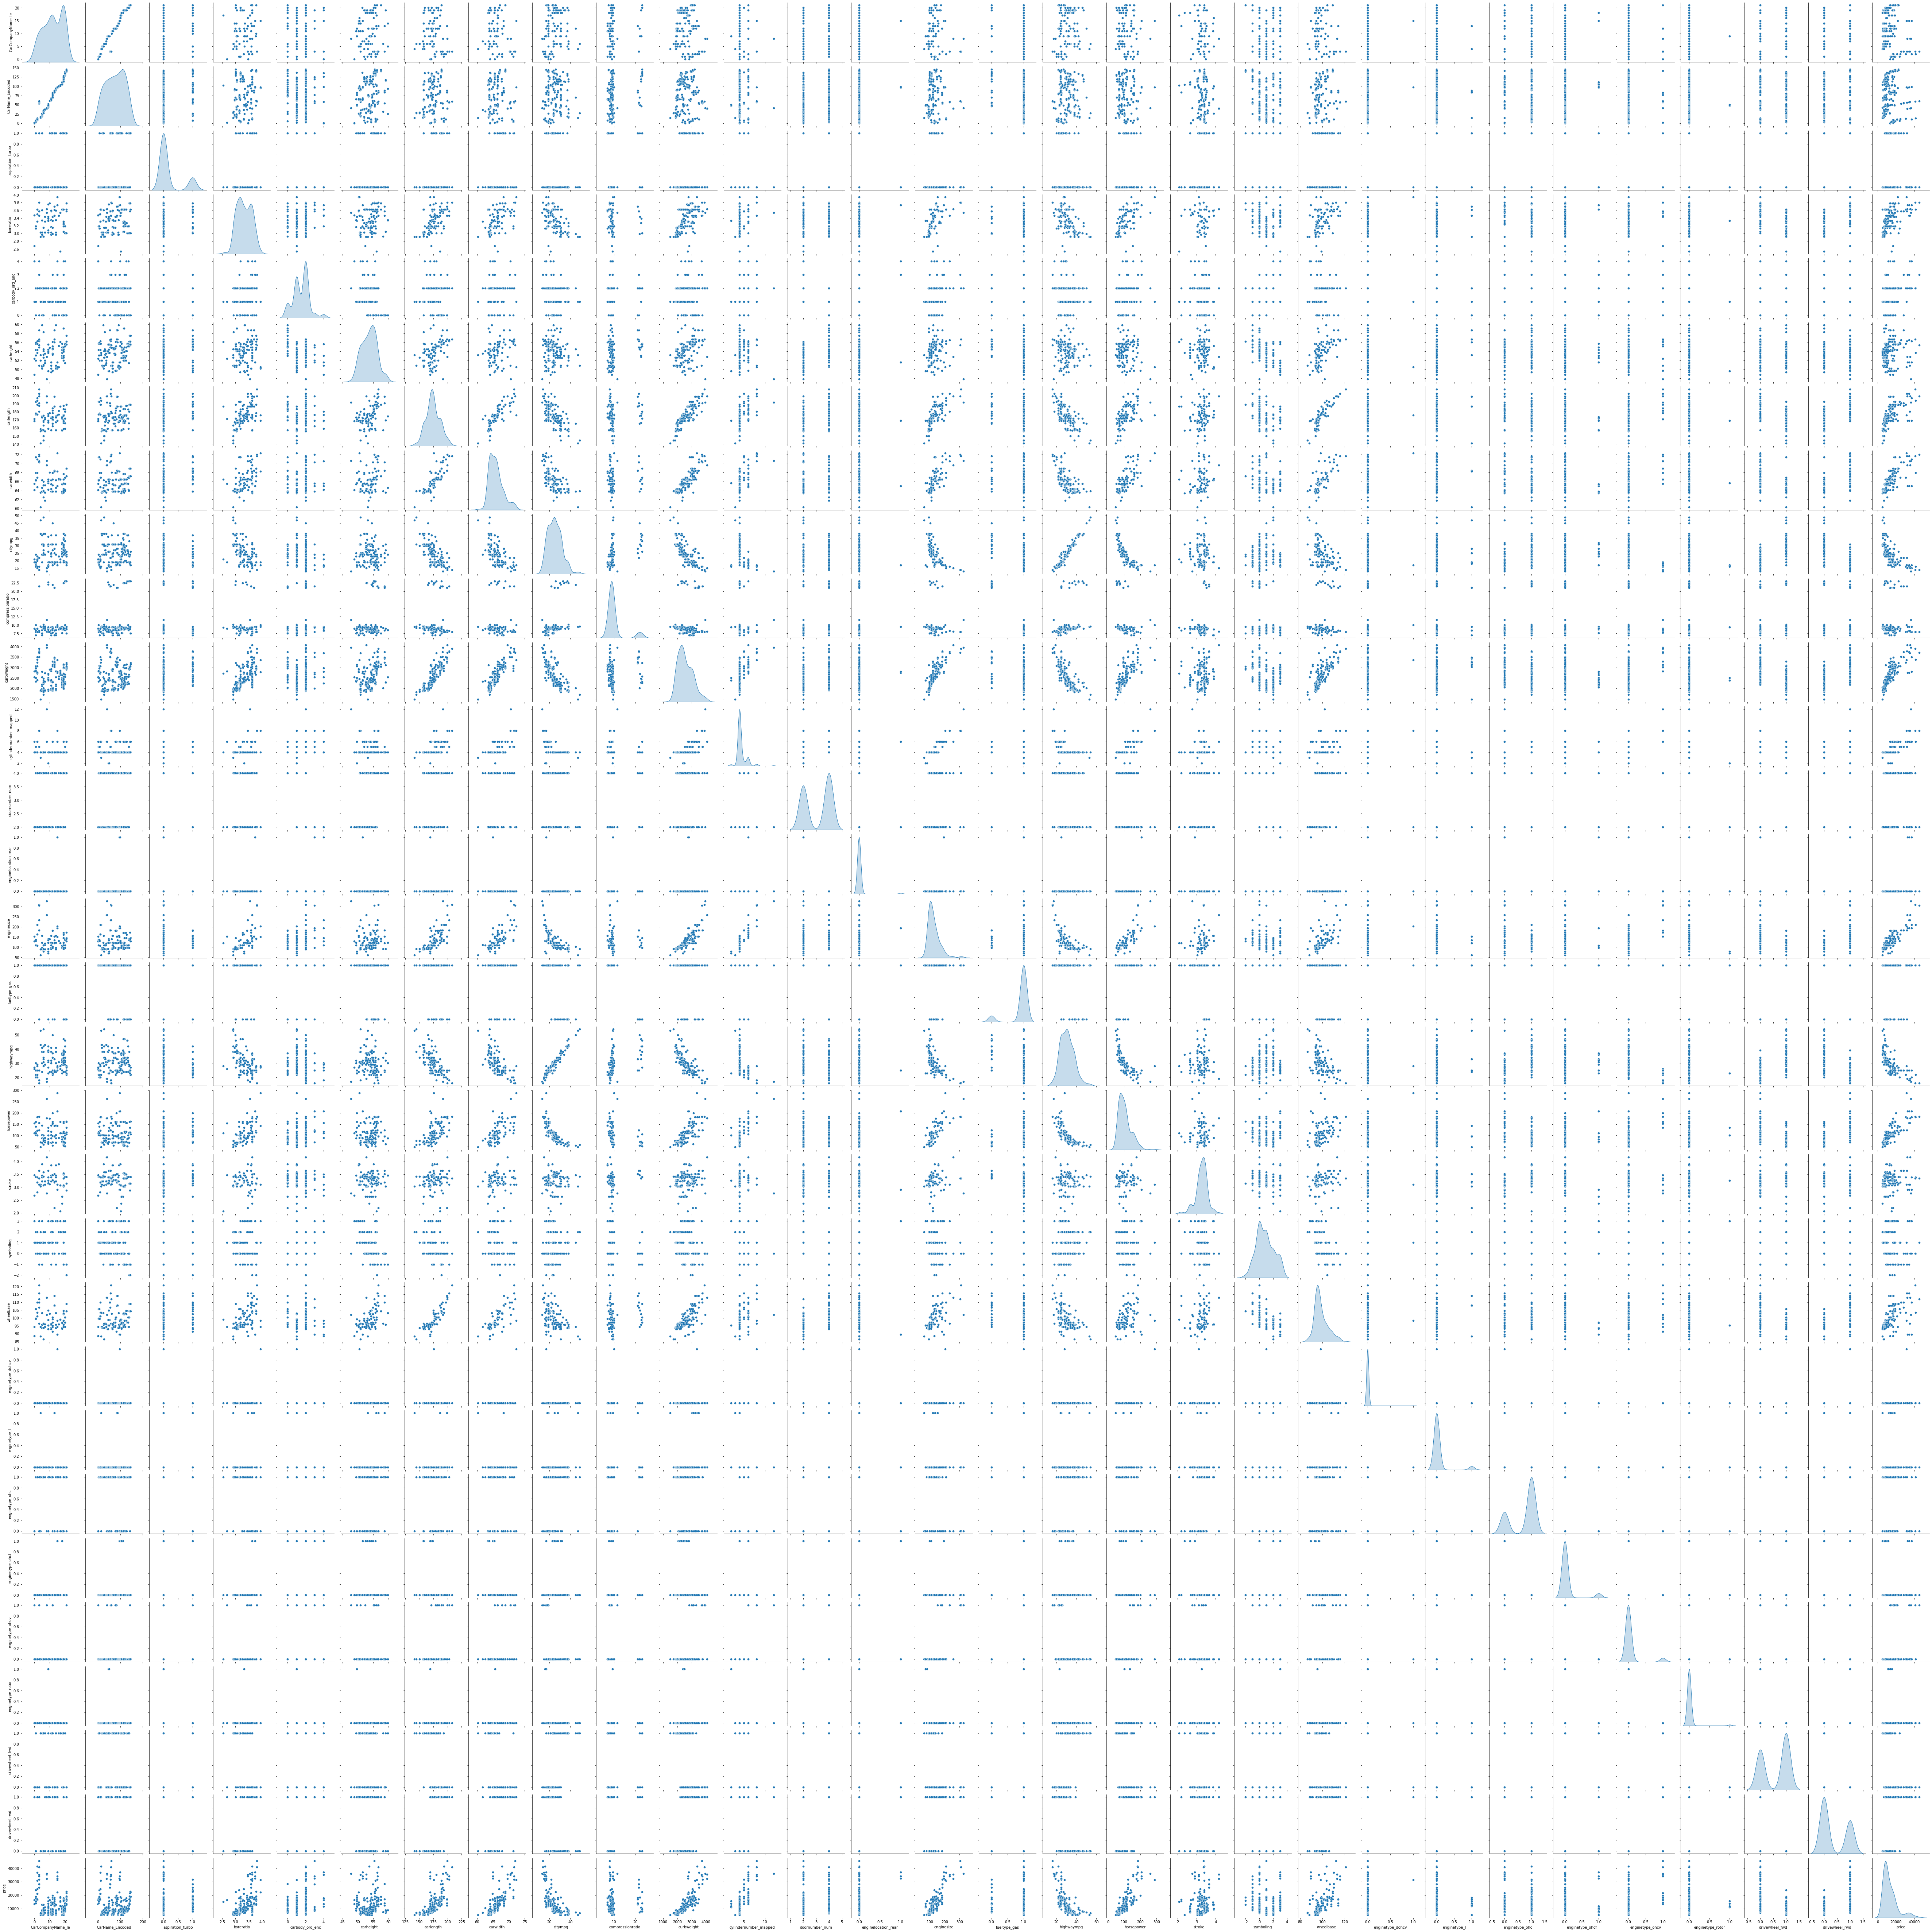

In [210]:
sns.pairplot(df_new, diag_kind = 'kde')

#### Splitting the data into train and test splits

In [212]:
train_x, test_x, train_y, test_y = train_test_split(df_new.drop(columns = target), 
                                                    df_new[target], 
                                                    test_size=0.25, 
                                                    random_state=9)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((153, 29), (52, 29), (153, 1), (52, 1))

#### Working on boreratio

<AxesSubplot: ylabel='Density'>

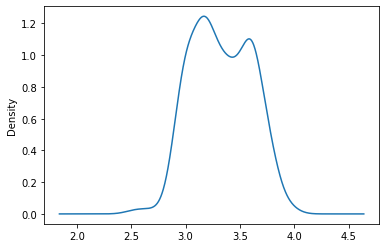

In [211]:
df_new['boreratio'].plot(kind = 'kde')

In [221]:
def model_evaluator(tr_x,ts_x,tr_y, ts_y):

    lin_reg = LinearRegression(n_jobs=-1)
    lin_reg.fit(tr_x, tr_y)

    #     for training performance
    pred_tr_y = lin_reg.predict(tr_x)
    tr_loss = mean_absolute_error(tr_y, pred_tr_y)

    #     for testing performance
    pred_ts_y = lin_reg.predict(ts_x)
    ts_loss = mean_absolute_error(ts_y, pred_ts_y)

    tr_score = lin_reg.score(tr_x, tr_y)
    ts_score = lin_reg.score(ts_x, ts_y)
    
    print(tr_score, tr_loss, ts_score, ts_loss)

In [217]:
# Scaling the training data
tr_ss = StandardScaler()
bore_ratio_scaled_tr = tr_ss.fit_transform(train_x[['boreratio']])

# # Scaling the testing data
ts_ss = StandardScaler()
bore_ratio_scaled_ts = ts_ss.fit_transform(test_x[['boreratio']])

train_x['bore_ratio_scaled'] = bore_ratio_scaled_tr.flatten()
test_x['bore_ratio_scaled'] = bore_ratio_scaled_ts.flatten()

train_x_ = train_x.drop(columns = ['boreratio'])
test_x_ = test_x.drop(columns = ['boreratio'])

In [223]:
model_evaluator(train_x_, test_x_, train_y, test_y)

0.9264555256129762 1544.0791862026383 0.9406991834993136 1469.3286523545876


In [225]:
# Scaling the training data
tr_mm = MinMaxScaler()
bore_ratio_scaled_tr = tr_mm.fit_transform(train_x[['boreratio']])

# # Scaling the testing data
ts_mm = MinMaxScaler()
bore_ratio_scaled_ts = ts_mm.fit_transform(test_x[['boreratio']])

train_x['bore_ratio_scaled'] = bore_ratio_scaled_tr.flatten()
test_x['bore_ratio_scaled'] = bore_ratio_scaled_ts.flatten()

train_x_ = train_x.drop(columns = ['boreratio'])
test_x_ = test_x.drop(columns = ['boreratio'])

In [226]:
model_evaluator(train_x_, test_x_, train_y, test_y)

0.9264555256129762 1544.0791862026429 0.9362014849202525 1583.7134904578454


In [227]:
train_x['bore_ratio_log'] = np.log(train_x.boreratio)
test_x['bore_ratio_log'] = np.log(test_x.boreratio)

train_x_ = train_x.drop(columns = ['boreratio'])
test_x_ = test_x.drop(columns = ['boreratio'])

In [228]:
model_evaluator(train_x_, test_x_, train_y, test_y)

0.9271260479378203 1549.6835002396167 0.45141984148078595 4712.8073111735


In [229]:
train_x['bore_ratio_sqrt'] = np.sqrt(train_x.boreratio)
test_x['bore_ratio_sqrt'] = np.sqrt(test_x.boreratio)

train_x_ = train_x.drop(columns = ['boreratio'])
test_x_ = test_x.drop(columns = ['boreratio'])

In [230]:
model_evaluator(train_x_, test_x_, train_y, test_y)

0.9330336417075291 1496.7840382238862 -7446.1132062067245 561225.8869518196


In [ ]:
y = m1x1 + m2x2 + m3x3 + c

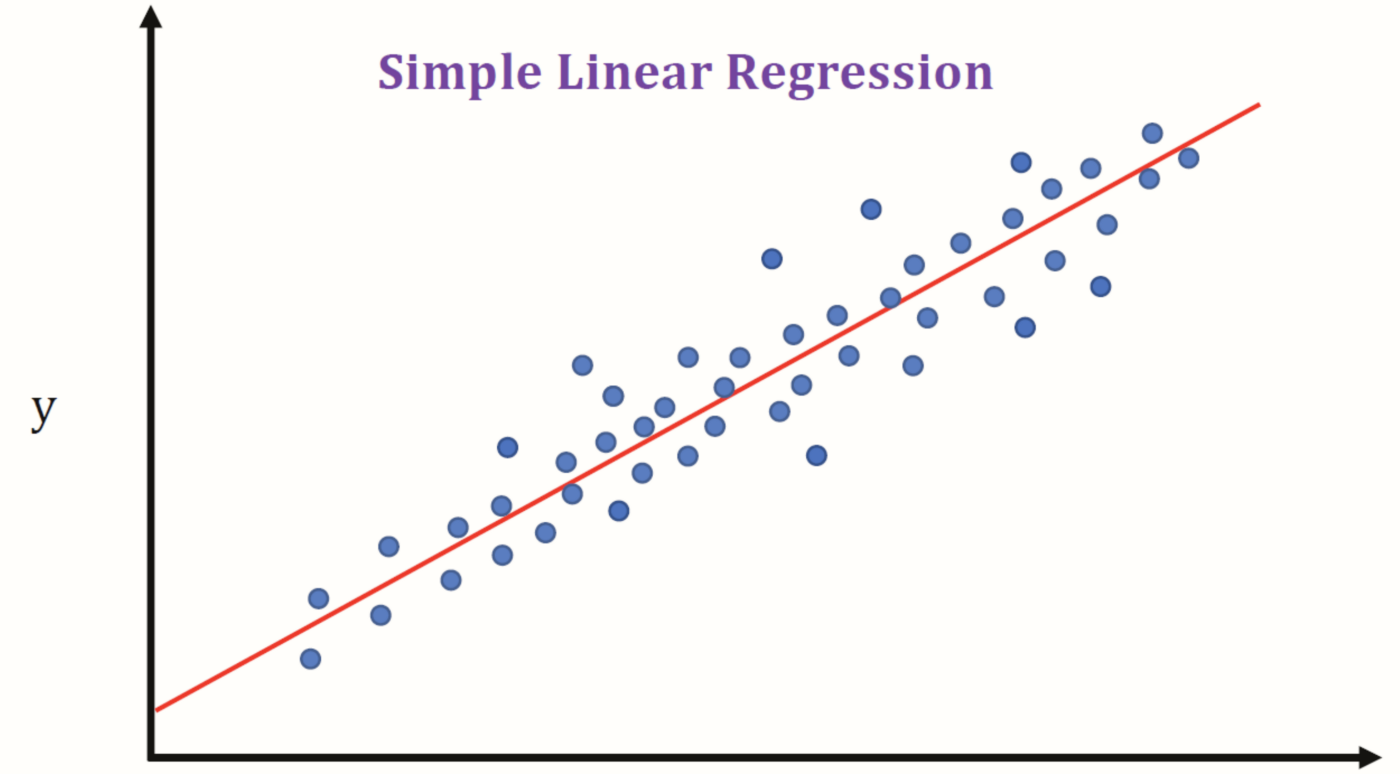

In [248]:
df_new.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [249]:
df_new.columns

Index(['CarCompanyName_le', 'CarName_Encoded', 'aspiration_turbo', 'boreratio',
       'carbody_ord_enc', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'cylindernumber_mapped',
       'doornumber_num', 'enginelocation_rear', 'enginesize', 'fueltype_gas',
       'highwaympg', 'horsepower', 'stroke', 'symboling', 'wheelbase',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'drivewheel_fwd',
       'drivewheel_rwd', 'price'],
      dtype='object')

In [250]:
df_new.CarCompanyName_le.nunique()

22

In [252]:
100*(df_new.CarCompanyName_le.value_counts()/df_new.shape[0])

19    15.609756
12     8.780488
9      8.292683
11     6.341463
6      6.341463
20     5.853659
18     5.853659
13     5.365854
21     5.365854
5      4.390244
3      3.902439
2      3.902439
1      3.414634
14     3.414634
17     2.926829
15     2.439024
7      1.951220
8      1.463415
4      1.463415
0      1.463415
16     0.975610
10     0.487805
Name: CarCompanyName_le, dtype: float64

In [256]:
100*(df_new[[i for i in df_new.columns if i.__contains__('enginetype')]].sum()/df_new.shape[0])

enginetype_dohcv     0.487805
enginetype_l         5.853659
enginetype_ohc      72.195122
enginetype_ohcf      7.317073
enginetype_ohcv      6.341463
enginetype_rotor     1.951220
dtype: float64

In [ ]:
OLS : Ordinary Least Squares

- y = mx+c

- parameter' = parameter - neta * partial derivative of the parameter w.r.t Loss(Objective function)

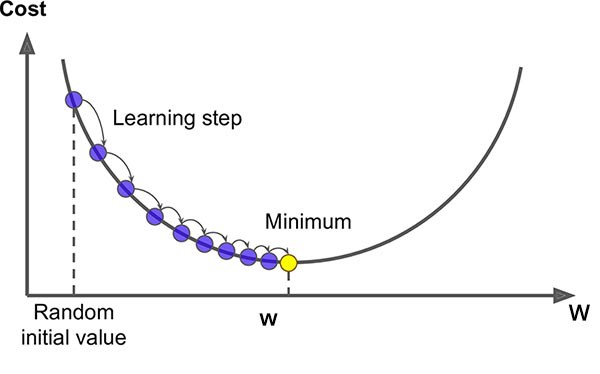

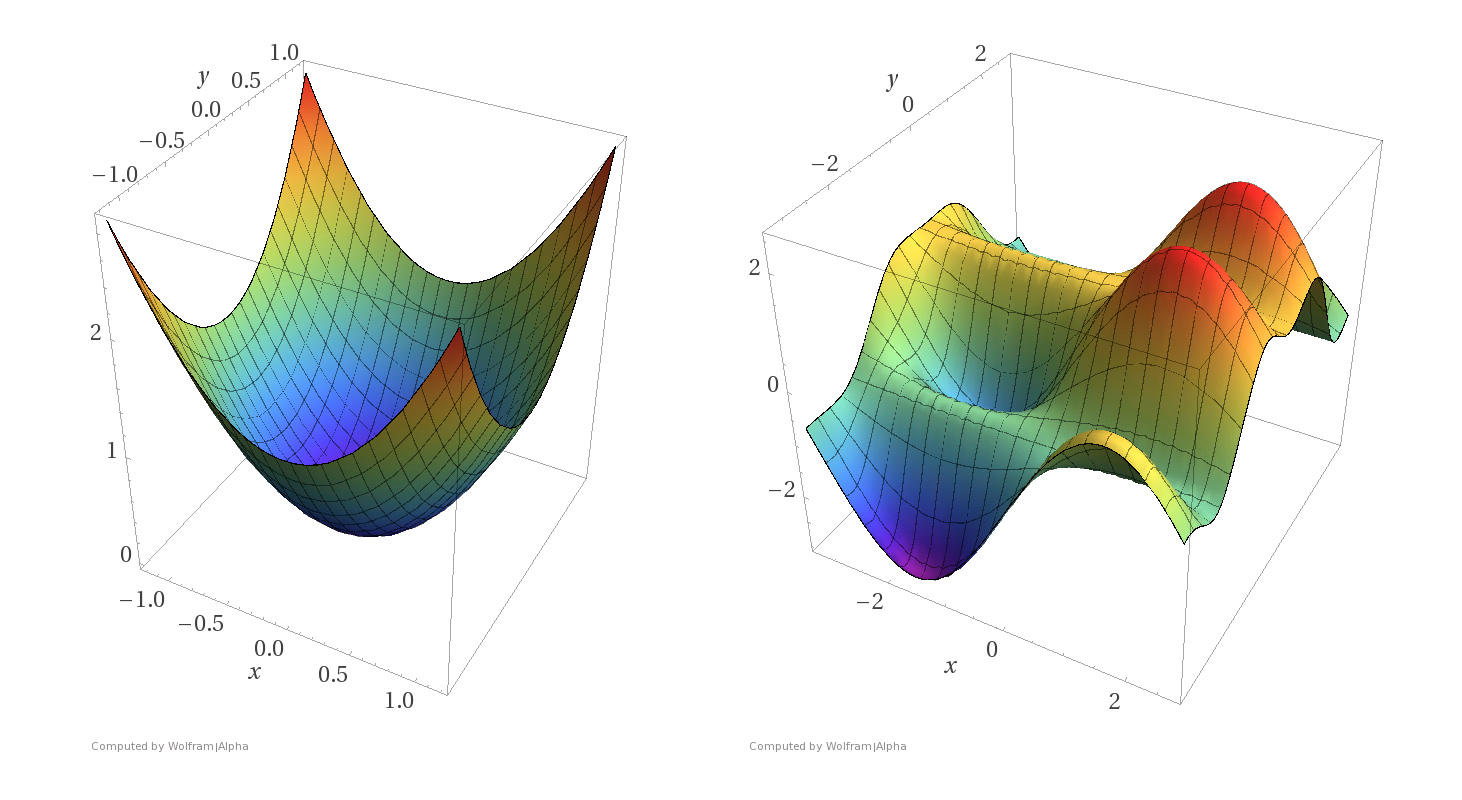

## Serialized objects

- Serialization : To convert an object into bytes format so that it can be saved in the system memory

##### Training the model

In [259]:
df_ = df_new.drop(columns = ['CarName_Encoded'])
df_.head()

,CarCompanyName_le,aspiration_turbo,boreratio,carbody_ord_enc,carheight,carlength,carwidth,citympg,compressionratio,curbweight,...,wheelbase,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,drivewheel_fwd,drivewheel_rwd,price
0,0,0,3.47,4,48.8,168.8,64.1,21,9.0,2548,...,88.6,0,0,0,0,0,0,0,1,13495.0
1,0,0,3.47,4,48.8,168.8,64.1,21,9.0,2548,...,88.6,0,0,0,0,0,0,0,1,16500.0
2,0,0,2.68,1,52.4,171.2,65.5,19,9.0,2823,...,94.5,0,0,0,0,1,0,0,1,16500.0
3,1,0,3.19,2,54.3,176.6,66.2,24,10.0,2337,...,99.8,0,0,1,0,0,0,1,0,13950.0
4,1,0,3.19,2,54.3,176.6,66.4,18,8.0,2824,...,99.4,0,0,1,0,0,0,0,0,17450.0


In [261]:
x, y = df_.drop(columns = ['price']), df_[['price']]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2, random_state=9)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((164, 28), (41, 28), (164, 1), (41, 1))

In [262]:
lin_reg_model = LinearRegression(n_jobs=-1)

lin_reg_model.fit(train_x, train_y)

LinearRegression(n_jobs=-1)

In [263]:
# Performing predictions and calculating the scores
lin_reg_model.score(test_x, test_y)

0.9432715734799914

In [265]:
mean_absolute_error(test_y, lin_reg_model.predict(test_x))

1330.5415849563365

#### Saving the model

In [266]:
import joblib

In [267]:
# Saving the model
joblib.dump(lin_reg_model, 'MyLinearRegression.pkl')

['MyLinearRegression.pkl']

In [270]:
# Loading the model
path_to_the_model = 'MyLinearRegression.pkl'
my_loaded_model = joblib.load(path_to_the_model)

In [271]:
my_loaded_model

LinearRegression(n_jobs=-1)

In [272]:
mean_absolute_error(test_y, my_loaded_model.predict(test_x))

1330.5415849563365

In [280]:
print(list(map(lambda x:round(x,2), test_x.iloc[0].values)))

[19.0, 0.0, 3.62, 4.0, 53.0, 176.2, 65.6, 24.0, 9.3, 2975.0, 4.0, 2.0, 0.0, 146.0, 1.0, 30.0, 116.0, 3.5, 2.0, 98.4, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [278]:
len(test_x.columns)

28

In [287]:
data = np.array([[19.0, 0.0, 3.62, 4.0, 53.0, 176.2, 65.6, 24.0, 9.3, 2975.0, 4.0, 2.0, 0.0, 146.0, 1.0, 30.0, 116.0, 3.5, 2.0, 98.4, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

In [288]:
my_loaded_model.predict(data)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[17254.93185018]])

# Logistic Regression Example

In [294]:
import numpy as np
import pandas as pd

x = np.random.randint(low = 23, high = 105, size = (50,))
y = np.random.choice([0,1], size = (50,))

In [295]:
df = pd.DataFrame({'Feature':x, 'Target':y})
df

,Feature,Target
0,60,1
1,29,1
2,57,0
3,31,1
4,87,1
5,37,0
6,46,1
7,81,0
8,55,1
9,27,1


In [333]:
def linear_regression_model(x, m=m, c=c):
    return (m*x)+c

def Sigmoid(z):
    return 1/(1+(np.e**(-z)))

def LogLoss(y,y_prob):
    neg_loss = (y*np.log(y_prob))+((1-y)*np.log(1-y_prob))
    return neg_loss*(-1)

In [341]:
m = 0.567
c = -5.4

def linear_regression_model(x, m=m, c=c):
    return (m*x)+c

df['z'] = df.Feature.apply(linear_regression_model)
df['PredictionProbability'] = df.z.apply(Sigmoid)
df['Loss'] = list(map(LogLoss, df.Target, df.PredictionProbability))
df = df.replace(np.inf, np.nan)
df.Loss.mean()

/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_48871/119072932.py:8: RuntimeWarning: divide by zero encountered in log
  neg_loss = (y*np.log(y_prob))+((1-y)*np.log(1-y_prob))
/var/folders/5z/4d_f5svn1b943qv43x1jf6tw0000gn/T/ipykernel_48871/119072932.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  neg_loss = (y*np.log(y_prob))+((1-y)*np.log(1-y_prob))


13.23661402432017

In [343]:
m = 0.2
c = -2.1

def linear_regression_model(x, m=m, c=c):
    return (m*x)+c

df['z2'] = df.Feature.apply(linear_regression_model)
df['PredictionProbability2'] = df.z2.apply(Sigmoid)
df['Loss2'] = list(map(LogLoss, df.Target, df.PredictionProbability2))
df = df.replace(np.inf, np.nan)
df.Loss2.mean()

5.326480945953929

In [356]:
m = 0.2
c = -8

def linear_regression_model(x, m=m, c=c):
    return (m*x)+c

df['z3'] = df.Feature.apply(linear_regression_model)
df['PredictionProbability3'] = df.z3.apply(Sigmoid)
df['Loss3'] = list(map(LogLoss, df.Target, df.PredictionProbability3))
df = df.replace(np.inf, np.nan)
df.Loss3.mean()

2.348882408873525

In [357]:
df

,Feature,Target,z,PredictionProbability,Loss,z2,PredictionProbability2,Loss2,z3,PredictionProbability3,Loss3
0,60,1,28.620,1.000000,3.719247e-13,4.0,0.982014,0.018150,4.0,0.982014,0.018150
1,29,1,11.043,0.999984,1.599862e-05,-2.2,0.099750,2.305083,-2.2,0.099750,2.305083
2,57,0,26.919,1.000000,2.691898e+01,3.4,0.967705,3.432828,3.4,0.967705,3.432828
3,31,1,12.177,0.999995,5.147484e-06,-1.8,0.141851,1.952978,-1.8,0.141851,1.952978
4,87,1,43.929,1.000000,NaN,9.4,0.999917,0.000083,9.4,0.999917,0.000083
5,37,0,15.579,1.000000,1.557900e+01,-0.6,0.354344,0.437488,-0.6,0.354344,0.437488
6,46,1,20.682,1.000000,1.042129e-09,1.2,0.768525,0.263282,1.2,0.768525,0.263282
7,81,0,40.527,1.000000,NaN,8.2,0.999725,8.200275,8.2,0.999725,8.200275
8,55,1,25.785,1.000000,6.334488e-12,3.0,0.952574,0.048587,3.0,0.952574,0.048587
9,27,1,9.909,0.999950,4.972390e-05,-2.6,0.069138,2.671645,-2.6,0.069138,2.671645


In [358]:
def actual_predictions(probabilities, threshold=0.5):
    return True if probabilities>=threshold else False

In [362]:
df['Predicted1'] = df.PredictionProbability.apply(actual_predictions).apply(int)
df['Predicted2'] = df.PredictionProbability2.apply(actual_predictions).apply(int)
df['Predicted3'] = df.PredictionProbability3.apply(actual_predictions).apply(int)

In [366]:
results = df[['Target', 'Predicted1', 'Predicted2', 'Predicted3']]
results

,Target,Predicted1,Predicted2,Predicted3
0,1,1,1,1
1,1,1,0,0
2,0,1,1,1
3,1,1,0,0
4,1,1,1,1
5,0,1,0,0
6,1,1,1,1
7,0,1,1,1
8,1,1,1,1
9,1,1,0,0


In [365]:
from sklearn.metrics import accuracy_score

In [367]:
accuracy_score(results.Target, results.Predicted1)

0.4

In [368]:
accuracy_score(results.Target, results.Predicted2)

0.46

In [369]:
accuracy_score(results.Target, results.Predicted3)

0.46